# Procesamiento de imagenes: Area del pasto y calles

- **Author:** Leonardo Cortés Tobón
- **Date:** 5/8/18
- **Affiliation:** Universidad Autonoma de Manizales

En este demo, mediremos el area del pasto y de la calle. Vamos a tocar muchos conceptos importantes de procesamiento de imagenes. 



### Instalar imagen

Antes de comenzar, instale scikit-image a través del administrador de paquetes de Canopy. Deberá iniciar sesión con su cuenta de estudiante para acceder a este paquete. Una vez instalado, puede verificar que está funcionando ejecutando:

In [3]:
import skimage

Si obtiene un error, intente reiniciar Canopy / IPython Notebook.

### Paso 1: Importar la imagen de calle y pasto

Descargué una imagen de una calle con pasto. Corté la calle y pinté todos el resto de blanco. Esta imagen se guarda como worldmap_cropped.png.
Principalmente usaremos scikit-image en esta demostración. Primero, usaremos skimage.io.imread para leer la imagen en la memoria. La imagen se puede trazar fácilmente usando la función imshow () de matplotlib. Podemos importar matplotlib, numpy y un puñado de otras bibliotecas científicas usan la función de magia en línea de% pylab.

### Paso 2: Propiedades de la imagen

Populating the interactive namespace from numpy and matplotlib


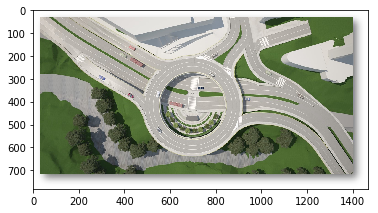

In [7]:
%pylab inline  
import skimage.io as skio

image = skio.imread('Imagen2.jpg')
plt.imshow(image)

La imagen de Scikit almacenará esta imagen como una matriz numpy. Como se trata de una imagen en color, esperamos que la imagen tenga tres dimensiones: dos dimensiones espaciales para las coordenadas xey de los píxeles y cuatro coordenadas de color para los canales rojo verde, azul y alfa (opacidad) del color. Entonces solo para darle un examen:

    I(x,y,r,g,b) = (200, 400, 0.5, 0.2, 0.7, 1.0)
    
Significaría que el píxel en la posición x = 200, y = 400 tiene un color rgb de (0.5, 0.2, 0.7) y tiene una opacidad de 1.0. La opacidad es una especie de unidad extraña; algunas imágenes en color se almacenan como tres canales, pero algunas se almacenan con este cuarto canal de opacidad. Scikit-image básicamente ignora la opacidad, y tú también puedes hacerlo para este ejemplo. Podemos verificar las dimensiones y la forma de la imagen fácilmente en numpy.
En 2]:

In [33]:
'shape = %s   dimensions = %s' % (image.shape, image.ndim)

'shape = (782, 1467, 3)   dimensions = 3'

### 1-channel/grayscale

'shape = (782, 1467)   dimensions = 2'

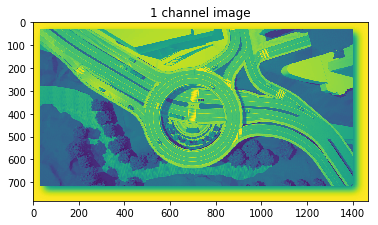

In [34]:
import skimage.color as skcolor

grayimage = skcolor.rgb2gray(image)
plt.imshow(grayimage)
plt.title('1 channel image');
'shape = %s   dimensions = %s' % (grayimage.shape, grayimage.ndim)

Podemos mapear fácilmente el espacio de color de 3 canales en un espacio de brillo / escala de grises de 1 canal. Cada color se asigna a un tono de gris usando una transformación estándar de color-2-gris (http://www.poynton.com/PDFs/ColorFAQ.pdf). Scikit-image lo hace muy fácil a través de su módulo `skcolor`. Para operaciones en el procesamiento de imágenes, a veces es ventajoso trabajar con imágenes de 1 canal / gris, y algunas veces con imágenes de 3 canales / rgb.

Probablemente estés pensando "hey, esto no es gris". De hecho, el gris es solo un mapa de color escalar. El mapa de color utilizado por matplotlib por defecto no es tan útil, y es por eso que la imagen de arriba todavía parece coloreada. ** Estos son COLORES FALSOS. ** Tales mapas de colores falsos a menudo se usan en imágenes "coloridas" de la NASA. Matplotlib tiene una gran cantidad de mapas de color integrados (http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)

Vamos a replicar con un mapa de color gris:

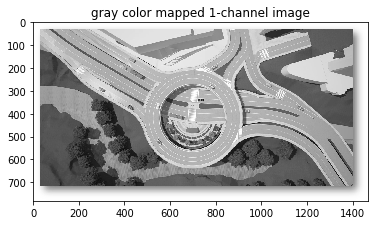

In [10]:
plt.imshow(grayimage, cmap='gray')
plt.title('gray color mapped 1-channel image');

### Segmentación de calles y pasto

La segmentación, el acto de extraer características interesantes de una imagen, es probablemente la más común en el procesamiento de imágenes. Tu cerebro es muy bueno en esto. ¿Probablemente has reconocido las calles y el pasto de inmediato? Pero, ¿cómo podemos definir explícitamente las características de las calles que lo aíslan del pasto en esta imagen? Debido a que elegimos una imagen coloreada, podemos definir esencialmente un filtro de brillo que mantendrá solo los píxeles en un cierto rango de color o escala de grises. Al hacerlo, se vuelve sencillo aislar las calles. Este proceso se llama umbralización.

Vamos a trazar el `histograma` del brillo de la imagen:

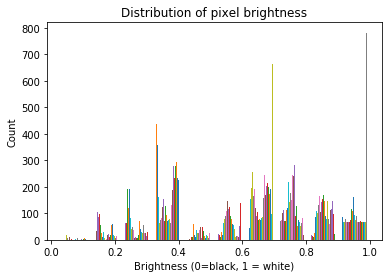

In [12]:
plt.hist(grayimage)
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness');

La propagación se debe a un pequeño píxel a píxel en el color de la imagen original, que probablemente se redondeó y suavizó durante la conversión descendente a gris. En cualquier caso, los principales contribuyentes al brillo que podría ser América corresponden a:

   - $0.75 \lt y \leq 0.95$
   - $0.20 \lt y \leq 0.40$
   
Solo mirando los ojos. Podemos crear un filtro en numpy a partir de esta información muy fácilmente utilizando lo que se denomina indexación booleana:

In [59]:
mask = (grayimage > 0.75) & (grayimage < 0.95)

Esto devuelve True para cualquier píxel que caiga dentro de los valores de brillo de 0.75 y 0.95, y False en cualquier otro lugar. Este proceso de indexación booleana también se conoce como enmascaramiento. Visualicemos nuestra máscara:

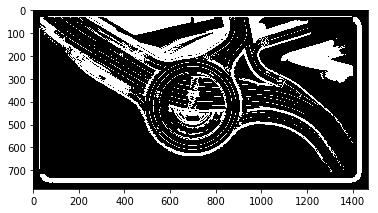

In [60]:
plt.imshow(mask, cmap='gray');

**Corresponde a las calles!!**

Probemos los otros filtros y valores (0.20-0.40)

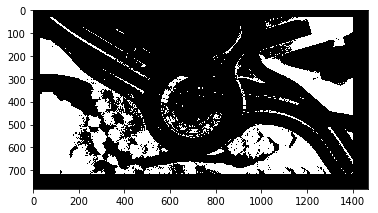

In [54]:
murica_mask = (grayimage > 0.20) & (grayimage < 0.40)
plt.imshow(murica_mask, cmap='gray');

### Área de medición

Ahora que tenemos las calles, es muy fácil medir la cantidad de píxeles en la imagen que corresponden al pasto. Solo sumamos el murica_mask. Todos los  True's evaluará a 1 y todas las Falses a 0.

In [72]:
'Area de las calles: %s cuadros de pixel' % np.sum(murica_mask)

'Area de las calles: 286307 cuadros de pixel'

Si miramos el número total de píxeles (px) en la imagen, es solo la dimensión x de la imagen multiplicada por la dimensión y.

In [115]:
px_x = image.shape[0]
px_y = image.shape[1]
netarea = px_x * px_y

'X px: %s   Y px: %s   Total Area: %s px^2' % (px_x, px_y, netarea)

'X px: 782   Y px: 1467   Total Area: 1147194 px^2'

Por lo tanto, el porcentaje de la imagen que ocupa las calles es solo la relación entre los píxeles cuadrados del pasto y el total de píxeles cuadrados. 

In [65]:
from __future__ import division

ratio = np.sum(murica_mask) / netarea
percent_ratio = 100.0 * ratio
print 'Percent of image occupied by America: %.2f%%' % percent_ratio

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Percent of image occupied by America: %.2f%%' % percent_ratio)? (<ipython-input-65-aadfde06054d>, line 5)

Pero para convertir los píxeles cuadrados en millas cuadradas, necesitamos algún tipo de conversión de píxeles a la longitud.